<a href="https://colab.research.google.com/github/GHooN99/My_study2/blob/master/colab/%EB%94%B0%EB%A6%89%EB%94%B0%EB%A6%89%EB%94%B0%EB%A5%B4%EB%A6%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from matplotlib import pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("2020.AI.bike-train.csv")
data.head(10)

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0
5,13,2,13.6,0.0,1.7,80.0,1073.0,0.027,34.0,15.0,39.0
6,14,3,10.6,0.0,1.5,58.0,1548.0,0.038,62.0,33.0,23.0
7,16,21,16.0,0.0,6.0,21.0,1961.0,0.050,90.0,28.0,146.0
8,19,9,13.8,0.0,1.9,64.0,1344.0,0.039,93.0,19.0,39.0
9,20,14,17.2,0.0,2.1,32.0,1571.0,0.025,64.0,19.0,83.0


In [70]:
y_data = data.iloc[:,-1]
y_data

0       49.0
1      159.0
2       26.0
3       57.0
4      431.0
       ...  
995    108.0
996     78.0
997     27.0
998    118.0
999      5.0
Name: count, Length: 1000, dtype: float64

In [71]:
data = data.drop('id',axis =1)
data = data.drop('count',axis=1)
data = data.drop('hour_bef_windspeed',axis=1)
data

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,89.0,576.0,0.027,76.0,33.0
1,13,20.1,0.0,48.0,916.0,0.042,73.0,40.0
2,6,13.9,0.0,79.0,1382.0,0.033,32.0,19.0
3,23,8.1,0.0,54.0,946.0,0.040,75.0,64.0
4,18,29.5,0.0,7.0,2000.0,0.057,27.0,11.0
...,...,...,...,...,...,...,...,...
995,14,20.4,0.0,12.0,2000.0,0.047,23.0,13.0
996,15,18.5,0.0,24.0,849.0,0.064,92.0,83.0
997,4,16.1,0.0,60.0,2000.0,0.028,39.0,28.0
998,16,17.7,0.0,32.0,1949.0,0.037,64.0,22.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4fa2519128>,
      dtype=object)

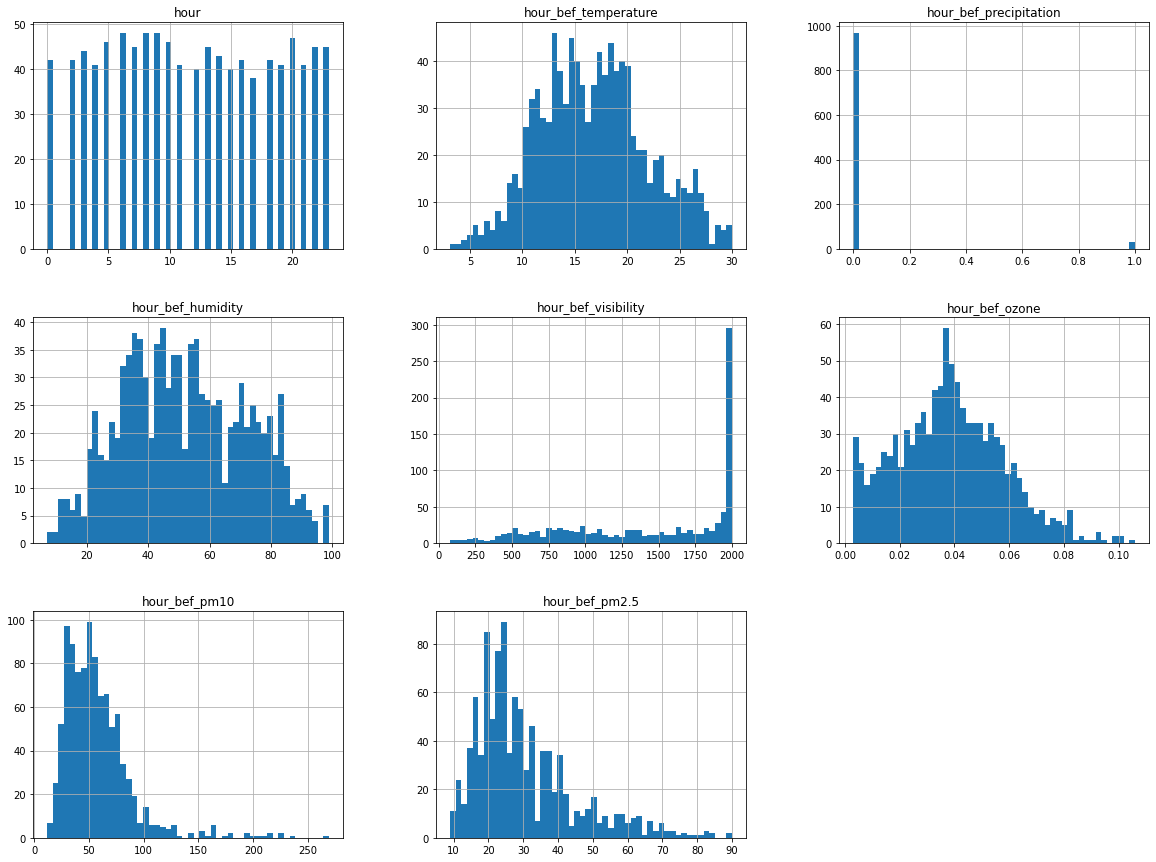

In [72]:
data.hist(bins=50, figsize=(20, 15))

In [73]:
target=['hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']
for k in target:
  print(k)
  data[k] = (data[k]-data[k].min())/(data[k].max()-data[k].min()) #정규화
  
data

hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,16.3,1.0,89.0,0.259105,0.233010,0.249027,0.296296
1,13,20.1,0.0,48.0,0.436004,0.378641,0.237354,0.382716
2,6,13.9,0.0,79.0,0.678460,0.291262,0.077821,0.123457
3,23,8.1,0.0,54.0,0.451613,0.359223,0.245136,0.679012
4,18,29.5,0.0,7.0,1.000000,0.524272,0.058366,0.024691
...,...,...,...,...,...,...,...,...
995,14,20.4,0.0,12.0,1.000000,0.427184,0.042802,0.049383
996,15,18.5,0.0,24.0,0.401145,0.592233,0.311284,0.913580
997,4,16.1,0.0,60.0,1.000000,0.242718,0.105058,0.234568
998,16,17.7,0.0,32.0,0.973465,0.330097,0.202335,0.160494


In [74]:
target=['hour_bef_temperature','hour_bef_humidity']
for k in target:
  print(k)
  data[k] = (data[k]-data[k].mean())/(data[k].std()) #표준화
  
data

hour_bef_temperature
hour_bef_humidity


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,20,-0.101796,1.0,1.823115,0.259105,0.233010,0.249027,0.296296
1,13,0.629439,0.0,-0.197749,0.436004,0.378641,0.237354,0.382716
2,6,-0.563628,0.0,1.330221,0.678460,0.291262,0.077821,0.123457
3,23,-1.679724,0.0,0.097987,0.451613,0.359223,0.245136,0.679012
4,18,2.438284,0.0,-2.218612,1.000000,0.524272,0.058366,0.024691
...,...,...,...,...,...,...,...,...
995,14,0.687168,0.0,-1.972166,1.000000,0.427184,0.042802,0.049383
996,15,0.321551,0.0,-1.380693,0.401145,0.592233,0.311284,0.913580
997,4,-0.140282,0.0,0.393723,1.000000,0.242718,0.105058,0.234568
998,16,0.167607,0.0,-0.986378,0.973465,0.330097,0.202335,0.160494


In [109]:
x_data = data
x_data = x_data.drop(['hour_bef_pm2.5'],axis=1)
x_data

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10
0,20,-0.101796,1.0,1.823115,0.259105,0.233010,0.249027
1,13,0.629439,0.0,-0.197749,0.436004,0.378641,0.237354
2,6,-0.563628,0.0,1.330221,0.678460,0.291262,0.077821
3,23,-1.679724,0.0,0.097987,0.451613,0.359223,0.245136
4,18,2.438284,0.0,-2.218612,1.000000,0.524272,0.058366
...,...,...,...,...,...,...,...
995,14,0.687168,0.0,-1.972166,1.000000,0.427184,0.042802
996,15,0.321551,0.0,-1.380693,0.401145,0.592233,0.311284
997,4,-0.140282,0.0,0.393723,1.000000,0.242718,0.105058
998,16,0.167607,0.0,-0.986378,0.973465,0.330097,0.202335


In [ ]:
with tf.device('/device:GPU:0'):
  model = Sequential()
  model.add(Dense(32,input_dim=7,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)))
  #model.add(Dropout(0.15))
  model.add(Dense(16,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)))
  #model.add(Dropout(0.15))
  model.add(Dense(8,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)))
  #model.add(Dense(4,activation='relu',kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)))
  model.add(Dropout(0.1))
  model.add(Dense(1,kernel_initializer='he_normal',kernel_regularizer=keras.regularizers.l2(0.001)))
  optim = optimizers.Nadam(learning_rate=0.0175)
  
  model.compile(optimizer=optim,loss='mse',metrics=['mse'])
  model.fit(x_data,y_data,batch_size=10,epochs=1000)


In [111]:
test_data = pd.read_csv("2020.AI.bike-test.csv")
test_data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,1655,4,14.6,0.0,0.6,49.0,2000.0,0.014,41.0,27.0
1,1657,20,21.8,0.0,4.4,40.0,2000.0,0.048,35.0,19.0
2,1660,22,18.3,0.0,1.0,37.0,970.0,0.032,169.0,38.0
3,1662,7,13.2,0.0,0.6,85.0,431.0,0.023,50.0,39.0
4,1663,8,8.9,0.0,0.9,77.0,613.0,0.005,82.0,40.0


In [112]:
test_data = test_data.drop(['id'],axis=1)
test_data = test_data.drop(['hour_bef_windspeed'],axis=1)
test_data

,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,4,14.6,0.0,49.0,2000.0,0.014,41.0,27.0
1,20,21.8,0.0,40.0,2000.0,0.048,35.0,19.0
2,22,18.3,0.0,37.0,970.0,0.032,169.0,38.0
3,7,13.2,0.0,85.0,431.0,0.023,50.0,39.0
4,8,8.9,0.0,77.0,613.0,0.005,82.0,40.0
...,...,...,...,...,...,...,...,...
322,4,16.8,0.0,53.0,2000.0,0.031,37.0,27.0
323,3,10.8,0.0,45.0,2000.0,0.039,34.0,19.0
324,5,18.3,0.0,54.0,2000.0,0.009,30.0,21.0
325,21,20.7,0.0,37.0,1395.0,0.082,71.0,36.0


In [113]:
target=['hour_bef_temperature','hour_bef_humidity']
for k in target:
  print(k)
  test_data[k] = (test_data[k]-test_data[k].mean())/(test_data[k].std()) #표준화
  
test_data

hour_bef_temperature
hour_bef_humidity


,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,4,-0.459489,0.0,-0.093880,2000.0,0.014,41.0,27.0
1,20,0.923736,0.0,-0.548304,2000.0,0.048,35.0,19.0
2,22,0.251335,0.0,-0.699779,970.0,0.032,169.0,38.0
3,7,-0.728449,0.0,1.723815,431.0,0.023,50.0,39.0
4,8,-1.554542,0.0,1.319882,613.0,0.005,82.0,40.0
...,...,...,...,...,...,...,...,...
322,4,-0.036837,0.0,0.108086,2000.0,0.031,37.0,27.0
323,3,-1.189524,0.0,-0.295846,2000.0,0.039,34.0,19.0
324,5,0.251335,0.0,0.158577,2000.0,0.009,30.0,21.0
325,21,0.712410,0.0,-0.699779,1395.0,0.082,71.0,36.0


In [114]:
target=['hour_bef_visibility','hour_bef_ozone','hour_bef_pm10','hour_bef_pm2.5']
for k in target:
  print(k)
  test_data[k] = (test_data[k]-test_data[k].min())/(test_data[k].max()-test_data[k].min()) #정규화
  
test_data = test_data.drop(['hour_bef_pm2.5'],axis=1)

hour_bef_visibility
hour_bef_ozone
hour_bef_pm10
hour_bef_pm2.5


In [ ]:
test_y = model.predict(test_data)
test_y=test_y.astype(int)
test_y

In [116]:
result = pd.DataFrame({'id':range(0,327),'count':test_y.flatten()})
result

,id,count
0,0,26
1,1,237
2,2,100
3,3,10
4,4,110
...,...,...
322,322,26
323,323,15
324,324,23
325,325,199


In [117]:
result.to_csv('result123.csv',index=False,header=True)